In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from deep_translator import GoogleTranslator

Properties basic informations

In [33]:
df1 = pd.read_csv('ids_properties.csv')

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_id       539 non-null    int64  
 1   property_name     539 non-null    object 
 2   intended_use      531 non-null    object 
 3   district_key      539 non-null    object 
 4   district_name     539 non-null    object 
 5   property_address  539 non-null    object 
 6   postal_code       539 non-null    int64  
 7   postal_area       538 non-null    object 
 8   grossarea         539 non-null    float64
 9   totalgrossarea    539 non-null    float64
 10  volume            539 non-null    float64
 11  totalfloorarea    539 non-null    float64
 12  year_built        539 non-null    int64  
 13  year_renovated    539 non-null    int64  
 14  floorcount        539 non-null    int64  
 15  attic_floorcount  539 non-null    int64  
 16  keyfield          539 non-null    int64  
dt

In [35]:
df1.head()

,property_id,property_name,intended_use,district_key,district_name,property_address,postal_code,postal_area,grossarea,totalgrossarea,volume,totalfloorarea,year_built,year_renovated,floorcount,attic_floorcount,keyfield
0,675204,Ylikiimingin koulun kentän huoltorakennus,359 Muut urheilu- ja kuntoilurakennukset,16,Ylikiiminki,Opinkuja 4,91300,YLIKIIMINKI,0.0,0.0,0.0,0.0,1960,0,0,0,502794
1,632117,"Kauppatori, makasiini nro 17",119 Muut myymälärakennukset,01,Keskusta,Kauppatori,90100,OULU,48.0,56.5,284.0,56.5,1700,0,0,0,502795
2,663903,"Perinnetupa, Koitelinkoski",999 Muualla luokittelemattomat rakennukset,30,Kiiminki,Koitelinkoskentie 456,90900,KIIMINKI,104.0,114.0,404.0,104.0,1950,1997,0,0,502796
3,675201,Ylikiimingin koulun yläkoulu,511 Yleissivistävien oppilaitosten rakennukset,16,Ylikiiminki,Harjutie 17 / Opinkuja 4,91300,YLIKIIMINKI,2079.0,2345.0,8540.0,2439.0,2004,0,3,0,502797
4,647201,"Oulunsalon urheilukenttä, huoltorakennus",359 Muut urheilu- ja kuntoilurakennukset,40,Oulunsalo,Koulutie 2,90460,OULUNSALO,136.0,154.0,226.0,82.0,1981,0,0,0,502798


In [43]:
df = df1["intended_use"]

In [59]:
def trad(text):
    if len(str(text)) > 5:
        return GoogleTranslator(source='fi', target='en').translate(text=text)
    return text

In [60]:
df.apply(trad)

TypeError: 'float' object is not subscriptable

In [39]:
df1["intended_use"][0]

'359 Muut urheilu- ja kuntoilurakennukset'

In [47]:
GoogleTranslator(source='fi', target='en').translate(text=df1["intended_use"][0])

'359 Other sports and fitness buildings'

In [28]:
df1["year_built"].value_counts(dropna=False)[0:5]

1920    40
0       26
1700    14
1984    12
1985    12
Name: year_built, dtype: int64

In [18]:
df1["year_renovated"].value_counts(dropna=False)[0:5]

0       330
2006     17
2007     16
2010     12
2004     10
Name: year_renovated, dtype: int64

In [19]:
df1["floorcount"].value_counts(dropna=False)[0:5]

0    223
1    170
2     97
3     33
4     14
Name: floorcount, dtype: int64

In [20]:
df1["intended_use"].value_counts(dropna=False)[0:5]

511 Yleissivistävien oppilaitosten rakennukset    138
231 Lasten päiväkodit                             125
999 Muualla luokittelemattomat rakennukset         36
359 Muut urheilu- ja kuntoilurakennukset           34
119 Muut myymälärakennukset                        17
Name: intended_use, dtype: int64

In [25]:
df1["property_name"].value_counts(dropna=False)[0:7]

Mäntylän päiväkoti, varasto                    2
Tuiran sairaala, varasto                       2
Tuiran sairaala, varasto                       2
Heikkilänkankaan monitoimitalo, pihavarasto    2
Oulunlahden koulu                              2
Sanginsuun koulu                               2
Haapalehdon päiväkoti, Willamiina              1
Name: property_name, dtype: int64

In [27]:
df1["property_id"].value_counts(dropna=False)[0:3]

622506    2
665601    1
620201    1
Name: property_id, dtype: int64

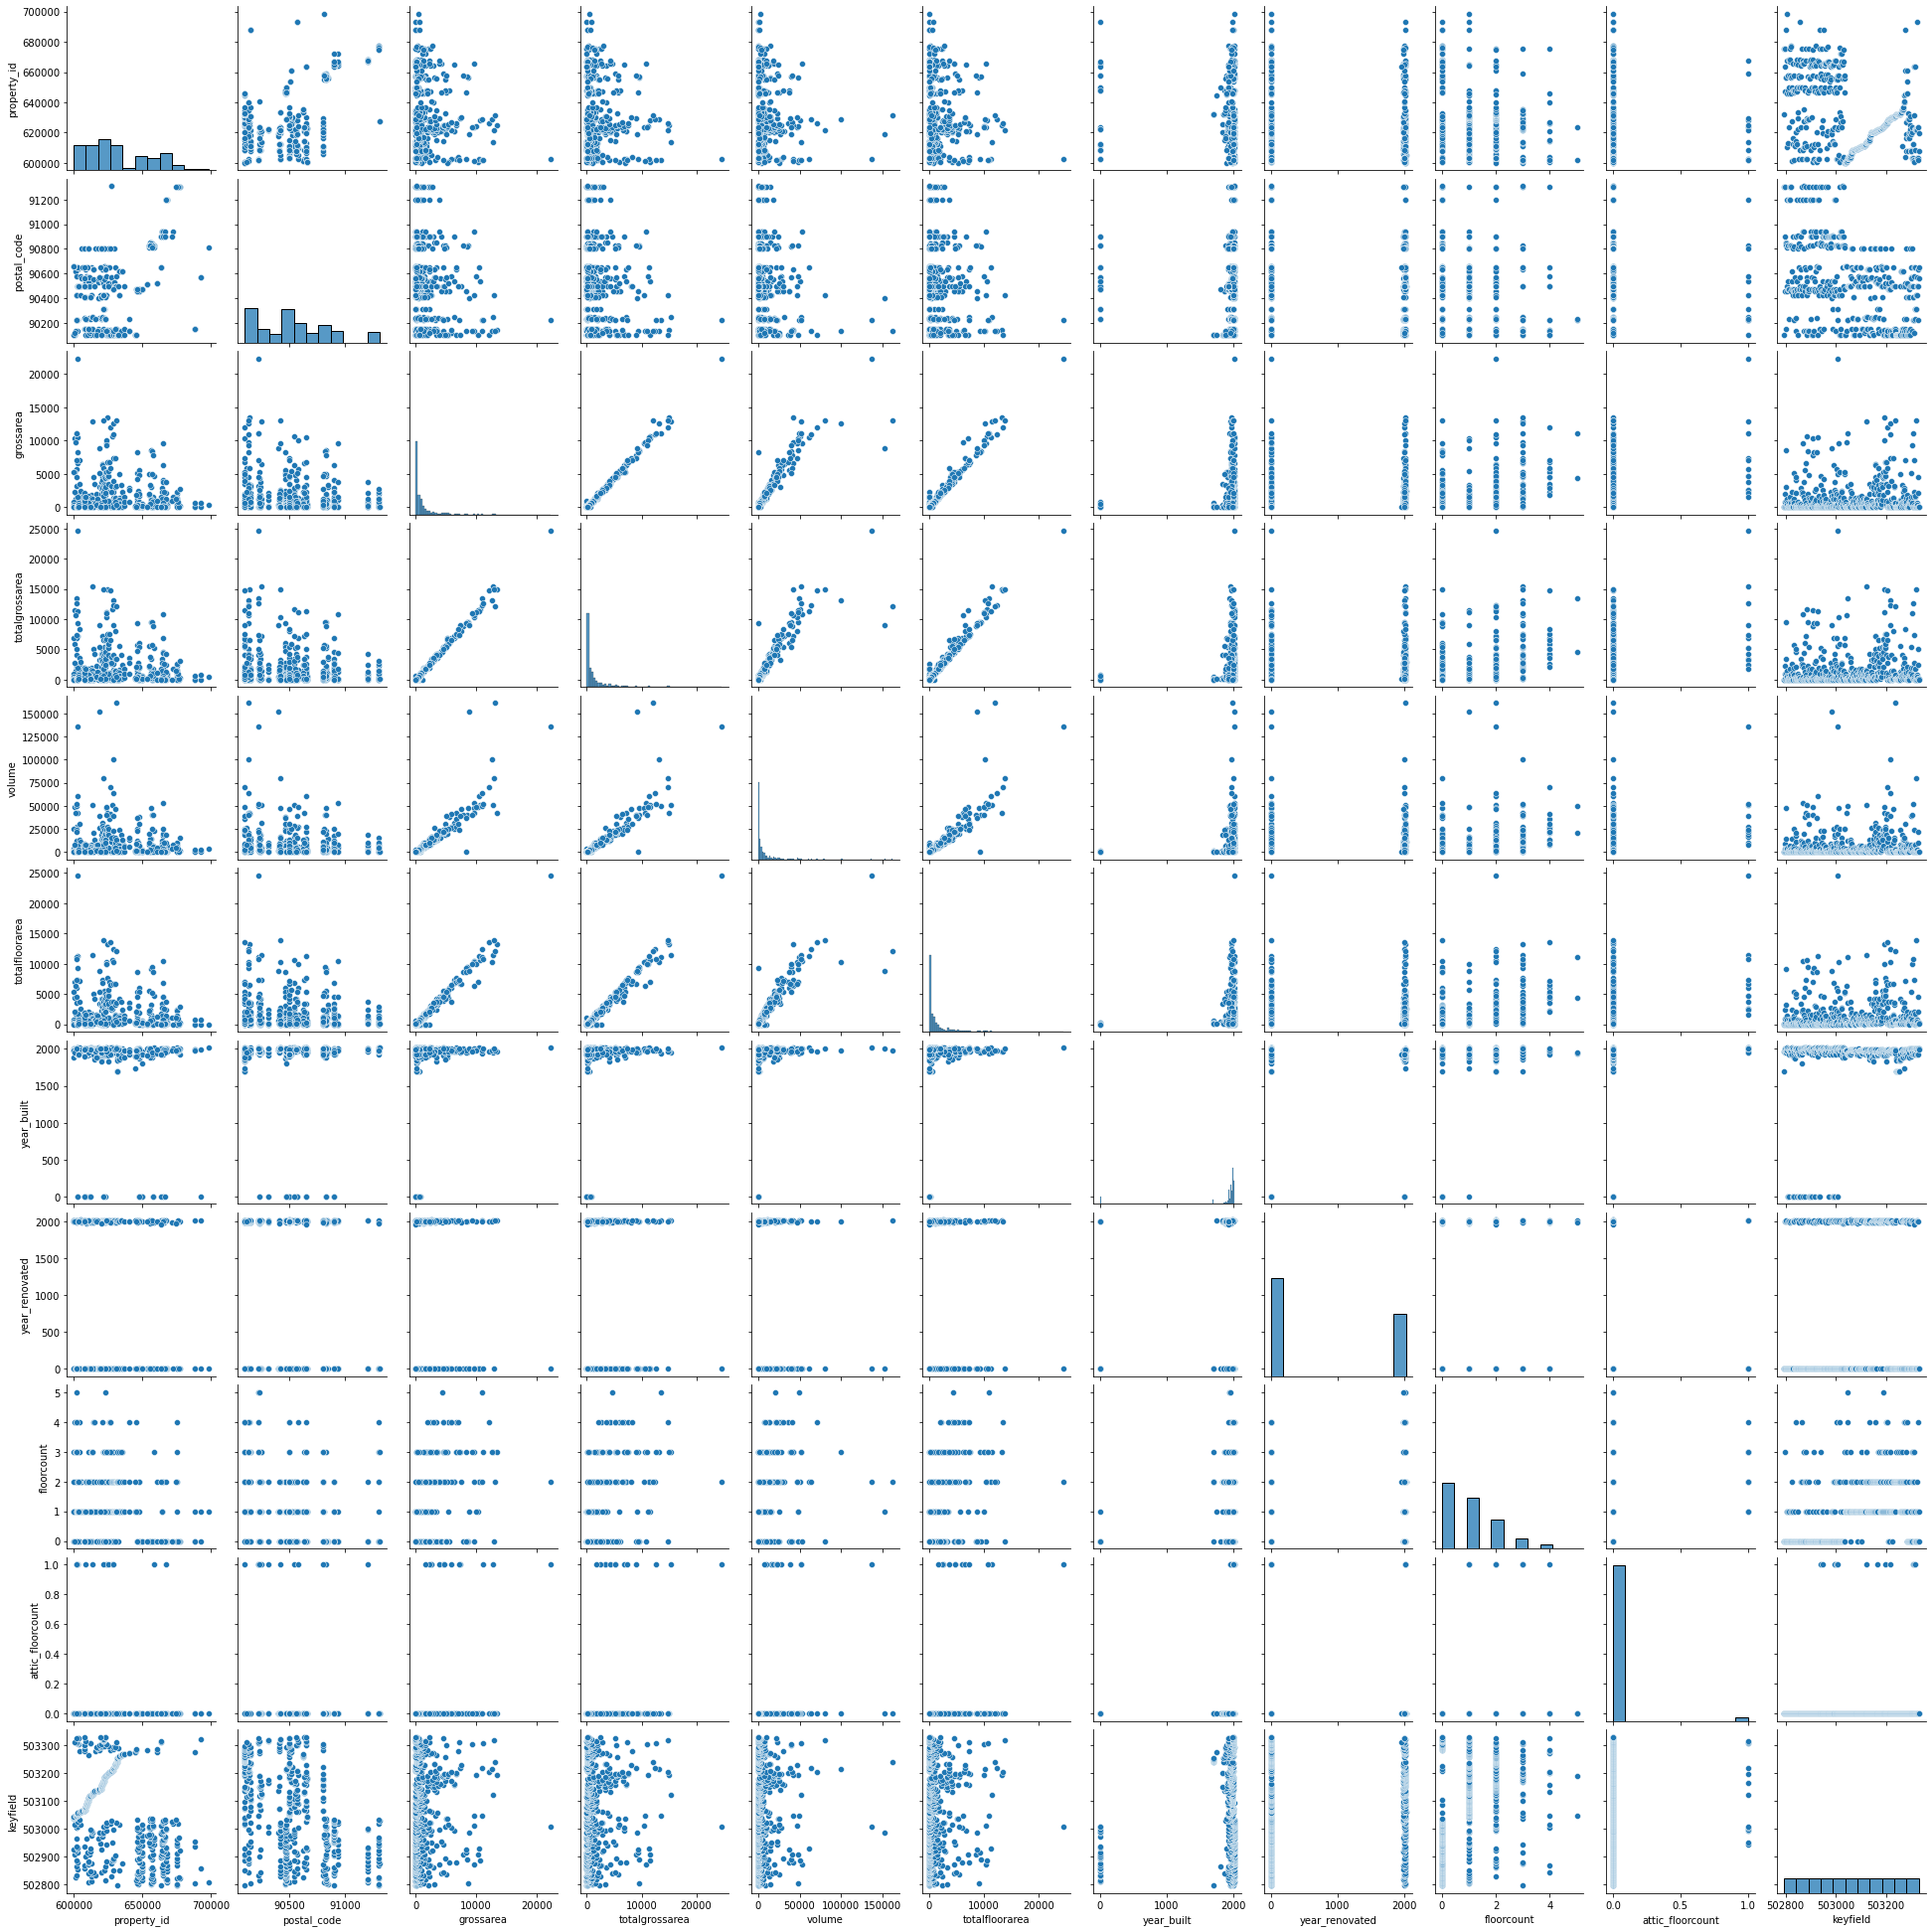

In [3]:
sns.pairplot(df)

Properties Consuption

In [3]:
df2 = pd.read_csv('OUKA_sample_data_hourly.csv')

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666288 entries, 0 to 666287
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   property_id           666288 non-null  int64  
 1   property_internal_id  666288 non-null  object 
 2   property_name         666288 non-null  object 
 3   consumption_measure   666288 non-null  object 
 4   year                  666288 non-null  int64  
 5   month                 666288 non-null  int64  
 6   day                   666288 non-null  int64  
 7   starting_hour         666288 non-null  int64  
 8   consumption           666288 non-null  float64
 9   keyfield              666288 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 50.8+ MB


In [10]:
df2[0:100]

,property_id,property_internal_id,property_name,consumption_measure,year,month,day,starting_hour,consumption,keyfield
0,675201,{08535153-3DD3-4EFC-956E-9DC059A11CA9},Ylikiimingin koulun yläkoulu,Sähkö,2018,12,10,3,42.0,146717665
1,675201,{08535153-3DD3-4EFC-956E-9DC059A11CA9},Ylikiimingin koulun yläkoulu,Sähkö,2018,12,9,3,36.0,146717666
2,675201,{08535153-3DD3-4EFC-956E-9DC059A11CA9},Ylikiimingin koulun yläkoulu,Sähkö,2018,12,8,3,35.0,146717667
3,675201,{08535153-3DD3-4EFC-956E-9DC059A11CA9},Ylikiimingin koulun yläkoulu,Sähkö,2018,12,1,3,29.0,146719477
4,675201,{08535153-3DD3-4EFC-956E-9DC059A11CA9},Ylikiimingin koulun yläkoulu,Sähkö,2018,12,6,3,39.0,146719478
...,...,...,...,...,...,...,...,...,...,...
95,675201,{08535153-3DD3-4EFC-956E-9DC059A11CA9},Ylikiimingin koulun yläkoulu,Sähkö,2018,12,8,6,39.0,146761142
96,675201,{08535153-3DD3-4EFC-956E-9DC059A11CA9},Ylikiimingin koulun yläkoulu,Sähkö,2018,12,1,6,33.0,146762232
97,675201,{08535153-3DD3-4EFC-956E-9DC059A11CA9},Ylikiimingin koulun yläkoulu,Sähkö,2018,12,6,6,42.0,146762233
98,675201,{08535153-3DD3-4EFC-956E-9DC059A11CA9},Ylikiimingin koulun yläkoulu,Sähkö,2018,12,15,6,42.0,146763044


In [11]:
df2["year"].value_counts(dropna=False)[0:7]

2019    332880
2018    303936
2020     29472
Name: year, dtype: int64